<a href="https://colab.research.google.com/github/Pakostipup/ML_labs/blob/main/%D0%BB%D0%B0%D0%B1%D0%B06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/heart.csv')

In [ ]:
df

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Выбираем числовые признаки
numeric_features = df.select_dtypes(include=['int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
df

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,0.448980,0.000000,0.180328,0.264706,0.214286,0.279412,0.412048,0.25,1.00,0.75,0.31250,0.318841,0.576419,0.275362,0.222222,1.0
1,0.673469,0.000000,0.344262,0.333333,0.571429,0.426471,0.380723,0.00,0.75,0.25,0.32500,0.173913,0.484716,0.413043,1.000000,1.0
2,0.673469,0.333333,0.262295,0.509804,0.642857,0.830882,0.534940,0.75,1.00,0.00,0.38750,0.492754,0.720524,0.833333,0.222222,1.0
3,0.571429,1.000000,0.262295,0.411765,0.785714,0.882353,0.286747,0.75,1.00,0.25,0.30000,0.173913,0.305677,0.862319,0.333333,1.0
4,0.673469,0.666667,0.245902,0.352941,0.357143,0.183824,0.296386,0.50,1.00,1.00,0.30000,0.000000,0.532751,0.217391,0.222222,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.612245,0.000000,0.221311,0.411765,0.357143,0.286765,0.433735,0.25,1.00,0.00,0.28125,0.130435,0.585153,0.318841,0.000000,0.0
196,0.061224,0.000000,0.180328,0.313725,0.571429,0.205882,0.000000,0.50,1.00,0.25,0.26250,0.289855,0.257642,0.326087,0.000000,0.0
197,0.000000,0.666667,0.344262,0.411765,0.357143,0.301471,0.216867,1.00,0.00,0.00,0.37500,0.420290,0.589520,0.362319,0.000000,0.0
198,0.530612,0.666667,0.426230,0.450980,0.357143,0.213235,0.024096,0.75,0.75,0.25,0.48750,0.463768,0.091703,0.355072,0.000000,0.0


In [ ]:
! pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

def interactive_kmeans_visualization(X, max_clusters=10, max_iterations=50):

    # преобразуем X в numpy array
    if isinstance(X, pd.DataFrame):
        X = X.values

    def plot_kmeans_iteration(X, centroids, labels=None, step=0):
        clear_output(wait=True)
        plt.figure(figsize=(8, 6))
        if labels is not None:
            plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.6)
        else:
            plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.6)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
        plt.title(f'K-means Iteration {step}')
        plt.legend()
        plt.show()

    def k_means_interactive(X, k, max_iters):
        np.random.seed(42)
        centroids = X[np.random.choice(X.shape[0], k, replace=False)]
        for step in range(max_iters):
            distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            plot_kmeans_iteration(X, centroids, labels, step)
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids

    def run_kmeans(k, max_iters):
        k_means_interactive(X, k, max_iters)

    k_slider = widgets.IntSlider(value=3, min=2, max=max_clusters, step=1, description='Clusters (k):')
    iter_slider = widgets.IntSlider(value=10, min=1, max=max_iterations, step=1, description='Max Iterations:')

    interactive_plot = widgets.interactive(run_kmeans, k=k_slider, max_iters=iter_slider)
    display(interactive_plot)

# Берем датасет и визуализируем K-means
interactive_kmeans_visualization(df[:100])

interactive(children=(IntSlider(value=3, description='Clusters (k):', max=10, min=2), IntSlider(value=10, desc…

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Определяем количество кластеров k
k = 2  # Вы можете изменить это значение в соответствии с вашими данными

# Создаем и обучаем модель KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_

# Добавляем метки кластеров в исходный DataFrame
df_k_means = df.copy()
df_k_means['Cluster'] = labels

# Вывод статистики по кластерам для каждого признака
print("Статистика по кластерам:")
for column in df.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_k_means.groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if k > 1:
    silhouette_avg = silhouette_score(df, labels)
    print(f"\nКоэффициент силуэта для k={k}: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен для k=1")

Статистика по кластерам:

Статистика для признака 'AGE_50':
             mean       std       min       max
Cluster                                        
0        0.659439  0.202125  0.102041  1.000000
1        0.471939  0.203422  0.000000  0.897959

Статистика для признака 'MD_50':
             mean       std  min  max
Cluster                              
0        0.421875  0.381412  0.0  1.0
1        0.468137  0.317860  0.0  1.0

Статистика для признака 'SBP_50':
             mean       std       min       max
Cluster                                        
0        0.325948  0.155931  0.098361  0.918033
1        0.288995  0.143914  0.000000  1.000000

Статистика для признака 'DBP_50':
             mean       std       min       max
Cluster                                        
0        0.443934  0.115414  0.264706  1.000000
1        0.445358  0.104539  0.000000  0.705882

Статистика для признака 'HT_50':
             mean       std       min       max
Cluster                   

**Общий анализ:**

Кластеры показывают различия в большинстве признаков, что указывает на адекватное разбиение данных. Например, есть заметные отличия в средних значениях для признаков AGE_50, MD_50, WT_50 и других.
Некоторые признаки незначительно различаются между кластерами, такие как DBP_50 и CL_STATUS.


**Возраст (AGE_50):**

В кластере 0 средний показатель выше (0.659) по сравнению с кластером 1 (0.472).
Кластер 0, вероятно, представляет более старшую возрастную группу.

**Систолическое и диастолическое артериальное давление (SBP_50, DBP_50):**

Систолическое давление (SBP_50) выше в кластере 0 (0.326) по сравнению с кластером 1 (0.289). Диастолическое давление (DBP_50) практически одинаково в обоих кластерах, что может свидетельствовать об отсутствии значимой роли этого признака для кластеризации.

**Рост и вес (HT_50, WT_50):**

Средний рост (HT_50) выше в кластере 1 (0.517) по сравнению с кластером 0 (0.499). Вес (WT_50) также выше в кластере 1 (0.443 против 0.416).

**Холестерин (CHOL_50, CHOL_62):**

В кластере 1 показатели холестерина выше, что может указывать на более высокий риск сердечно-сосудистых заболеваний.

**Сердечно-сосудистый риск (IHD_DX):**

В кластере 1 больше людей с диагнозом ишемической болезни сердца (0.175 против 0.118).

**Статус и смерть (CL_STATUS, DEATH):**

Кластер 0 имеет статус пациентов с почти полным значением (CL_STATUS около 0.965), но все пациенты в этом кластере умерли (DEATH = 1). В кластере 1 смерти отсутствуют (DEATH = 0).

**Гипотезы:**

Кластер 0 может представлять группу пожилых людей с более высоким риском смертности. Это подтверждается более высокими средними значениями возраста, давлением и уровнями холестерина. Кластер 1 характеризуется как более молодая и здоровая группа. Это подкрепляется более низкими показателями возраста, веса и холестерина.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def interactive_dbscan_visualization(X):
    if isinstance(X, pd.DataFrame):
        X = X.values

    def plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric):
        clear_output(wait=True)
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        plt.figure(figsize=(8, 6))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Черный цвет для шума
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6)

        plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
        plt.show()

    def run_dbscan(eps, min_samples, metric):
        # Обучение DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
        db.fit(X)
        labels = db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric)

    # Виджеты для настройки параметров
    eps_slider = widgets.FloatSlider(value=0.5, min=0.1, max=1.0, step=0.05, description='eps:')
    min_samples_slider = widgets.IntSlider(value=5, min=1, max=20, step=1, description='min_samples:')
    metric_dropdown = widgets.Dropdown(options=['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
                                       value='euclidean', description='metric:')

    ui = widgets.VBox([eps_slider, min_samples_slider, metric_dropdown])
    out = widgets.interactive_output(run_dbscan, {'eps': eps_slider, 'min_samples': min_samples_slider, 'metric': metric_dropdown})
    display(ui, out)

# Пример использования
interactive_dbscan_visualization(df[:120])


Output()

Количество кластеров: 2
Статистика по кластерам:

Статистика для признака 'AGE_50':
             mean       std       min       max  count
Cluster                                               
0        0.659439  0.202125  0.102041  1.000000     64
1        0.471939  0.203422  0.000000  0.897959    136

Статистика для признака 'MD_50':
             mean       std  min  max  count
Cluster                                     
0        0.421875  0.381412  0.0  1.0     64
1        0.468137  0.317860  0.0  1.0    136

Статистика для признака 'SBP_50':
             mean       std       min       max  count
Cluster                                               
0        0.325948  0.155931  0.098361  0.918033     64
1        0.288995  0.143914  0.000000  1.000000    136

Статистика для признака 'DBP_50':
             mean       std       min       max  count
Cluster                                               
0        0.443934  0.115414  0.264706  1.000000     64
1        0.445358  0.104539

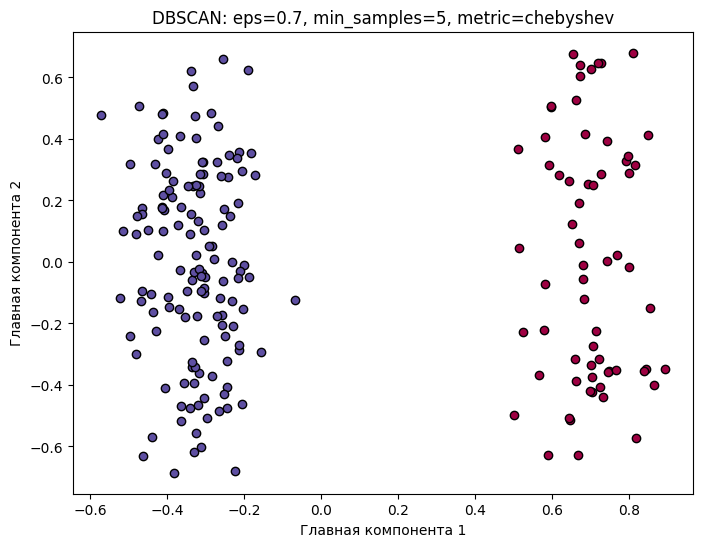

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Параметры DBSCAN
eps = 0.7
min_samples = 5
metric = 'chebyshev'

# Обучение модели DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
labels = db.fit_predict(df)

# Добавляем метки кластеров в DataFrame
df_dbscan = df.copy()
df_dbscan['Cluster'] = labels

# Количество кластеров (исключая шум)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Количество кластеров: {n_clusters_}")

# Вывод статистики по кластерам
print("Статистика по кластерам:")
for column in df.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_dbscan[df_dbscan['Cluster'] != -1].groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max', 'count'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if n_clusters_ > 1:
    silhouette_avg = silhouette_score(df[df_dbscan['Cluster'] != -1], labels[df_dbscan['Cluster'] != -1])
    print(f"\nКоэффициент силуэта для DBSCAN: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен, так как найден один кластер или данные являются шумом.")


# Визуализация результатов (с использованием PCA для снижения размерности)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    if k == -1:
        # Черный цвет для шума
        col = [0, 0, 0, 1]
    plt.plot(df_pca.loc[class_member_mask, 'PC1'],
             df_pca.loc[class_member_mask, 'PC2'],
             'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()


Кластер 0 состоит из 64 записей, а кластер 1 — из 136 записей. Соотношение размеров кластеров неравномерное, что может повлиять на их интерпретацию.
Для большинства признаков наблюдаются различия между кластерами, но они не всегда значительные.

**Коэффициент силуэта:** значение 0.2687 говорит о слабой чёткости кластеров. Это может указывать на то, что данные не полностью разделены на естественные группы, или на то, что выбранный алгоритм/метрика недостаточно хорошо описывает структуру данных.

**Возраст (AGE_50):**

Средний возраст в кластере 0 выше (0.659 против 0.472). Это предполагает, что кластер 0 включает более пожилую группу.

**Артериальное давление (SBP_50, DBP_50, SBP_62, DBP_62):**

Систолическое давление (SBP_50) выше в кластере 0 (0.326 против 0.289). Диастолическое давление (DBP_50) практически одинаково для двух кластеров (различие менее 0.002). Сходная ситуация с данными для давления в SBP_62 и DBP_62. Различия минимальны, что указывает на слабую зависимость давления от принадлежности к кластеру.

**Рост и вес (HT_50, WT_50, WT_62):**

В кластере 1 средний рост (HT_50) и вес (WT_50, WT_62) немного выше, чем в кластере 0. Это может говорить о более молодом и, возможно, физически здоровом составе кластера 1.

**Холестерин (CHOL_50, CHOL_62):**

Уровень холестерина выше в кластере 1.

**Статус пациентов (CL_STATUS) и смерти (DEATH):**

Практически все пациенты из кластера 0 умерли (DEATH = 1). Это ключевая характеристика кластера 0. В кластере 1 смертей нет (DEATH = 0).

**Ишемическая болезнь сердца (IHD_DX):**

Процент пациентов с ишемической болезнью сердца выше в кластере 1 (17.5% против 11.8%), несмотря на отсутствие смертей. Это может быть связано с другими компенсирующими факторами.

**Социально-экономический статус (SES):**

Средний статус немного выше в кластере 1 (0.491 против 0.453), что может объяснить различия в доступе к медицинской помощи и, возможно, снижении смертности.

**Гипотезы:**
* Кластер 0 — пожилые пациенты с высокой смертностью. Повышенный возраст, давление и уровень смертности указывают на более уязвимую группу. Эти пациенты, вероятно, имеют значительные хронические заболевания.

* Кластер 1 — более молодая группа с рисками для здоровья. Несмотря на отсутствие смертей, в кластере выше уровень холестерина и процент пациентов с ишемической болезнью сердца.

In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
# Кластеризация K-means
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(df)

# Индекс Калински-Харабаза
ch_score_kmeans = calinski_harabasz_score(df, labels_kmeans)
print(f"Индекс Калински-Харабаза для K-means: {ch_score_kmeans:.4f}")

# Индекс Дэвиса-Болдина
db_score_kmeans = davies_bouldin_score(df, labels_kmeans)
print(f"Индекс Дэвиса-Болдина для K-means: {db_score_kmeans:.4f}")

# Коэффициент силуэта
sh_score_kmeans = silhouette_score(df, labels_kmeans)
print(f"Коэффициент силуэта для K-means: {sh_score_kmeans:.4f}")

Индекс Калински-Харабаза для K-means: 68.1179
Индекс Дэвиса-Болдина для K-means: 1.5635
Коэффициент силуэта для K-means: 0.2687


In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

eps = 0.8
min_samples = 10

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(df)

# Исключаем шумовые точки (метки -1)
mask = labels_dbscan != -1
df_scaled_dbscan = df[mask]
labels_dbscan_filtered = labels_dbscan[mask]

# Проверяем, есть ли достаточное количество кластеров для расчета метрик
if len(set(labels_dbscan_filtered)) > 1:
    # Индекс Калински-Харабаза
    ch_score_dbscan = calinski_harabasz_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Калински-Харабаза для DBSCAN: {ch_score_dbscan:.4f}")

    # Индекс Дэвиса-Болдина
    db_score_dbscan = davies_bouldin_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Дэвиса-Болдина для DBSCAN: {db_score_dbscan:.4f}")

    # Коэффициент силуэта
    sh_score_dbscan = silhouette_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Коэффициент силуэта для DBSCAN: {sh_score_dbscan:.4f}")
else:
    print("Недостаточно кластеров для вычисления метрик для DBSCAN.")

Индекс Калински-Харабаза для DBSCAN: 66.0642
Индекс Дэвиса-Болдина для DBSCAN: 1.4611
Коэффициент силуэта для DBSCAN: 0.2885


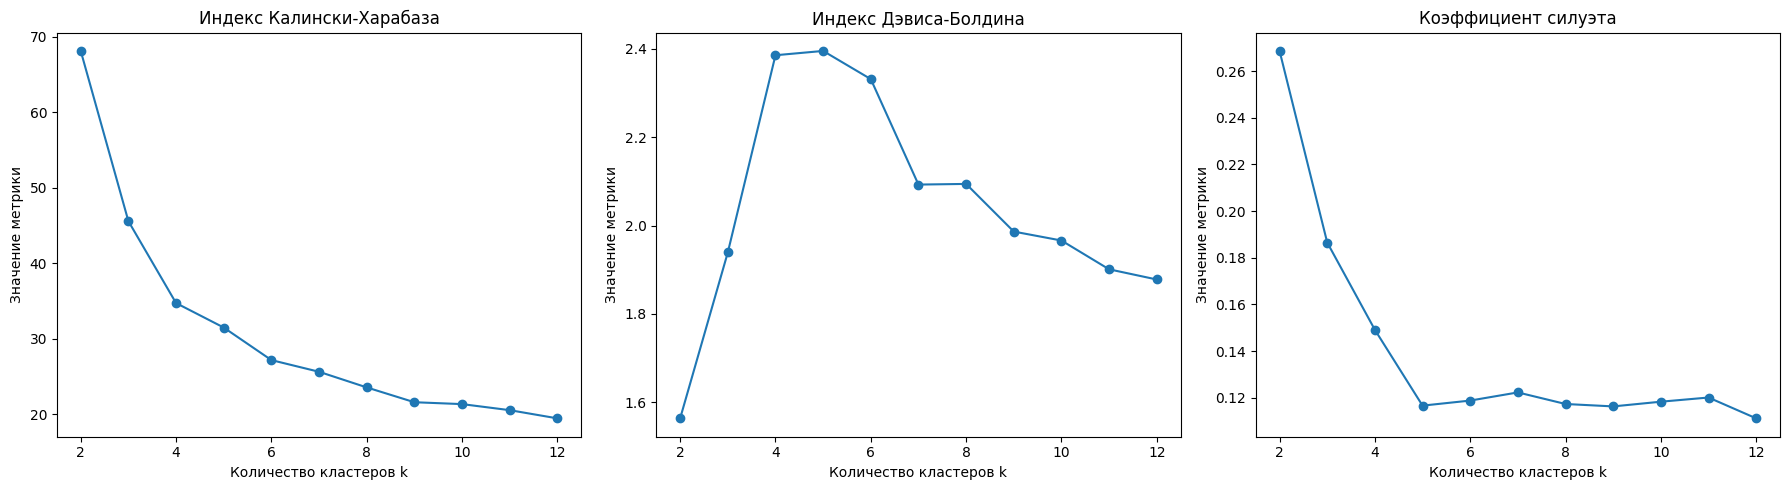

In [ ]:
# Диапазон значений k
k_range = range(2, 13)

# Списки для хранения метрик
ch_scores = []
db_scores = []
silhouette_scores = []

for k in k_range:
    # Создаем и обучаем модель KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)

    # Вычисляем метрики
    ch_score = calinski_harabasz_score(df, labels)
    db_score = davies_bouldin_score(df, labels)
    silhouette_avg = silhouette_score(df, labels)

    # Сохраняем метрики
    ch_scores.append(ch_score)
    db_scores.append(db_score)
    silhouette_scores.append(silhouette_avg)

# Построение графиков
plt.figure(figsize=(18, 5))

# График Индекса Калински-Харабаза
plt.subplot(1, 3, 1)
plt.plot(k_range, ch_scores, marker='o')
plt.title('Индекс Калински-Харабаза')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Индекса Дэвиса-Болдина
plt.subplot(1, 3, 2)
plt.plot(k_range, db_scores, marker='o')
plt.title('Индекс Дэвиса-Болдина')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Коэффициента силуэта
plt.subplot(1, 3, 3)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

plt.tight_layout()
plt.show()

Видим, что наилучшие значения индексов получаем при **2-х кластерах**.